In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Load the product data in a dataframe

In [3]:
def parse(path):
  f = open(path, 'r')
  for l in f:
    yield eval(l)
  f.close()
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('data/swiss_products.json')
df

,asin,categories,title,brand,salesrank,related,imurl,price,description
0,0767821556,"[[movies & tv, movies]]","bell, book and candle",bell,{'movies & tv': 10107},"{'bought_together': ['b000083c6r'], 'also_boug...",http://ecx.images-amazon.com/images/i/51%2bpng...,7.68,"meet gillan holroyd (kim novak), greenwich vil..."
1,0800121260,"[[movies & tv, movies]]",hero [vhs],hero,{'movies & tv': 443525},NaN,http://ecx.images-amazon.com/images/i/51e50h73...,6.70,dustin hoffman plays a lowlife who happens upo...
2,0978571630,"[[toys & games, games, board games]]",dilbert board game,hyperion,{'toys & games': 314166},"{'bought_together': ['1933318945'], 'also_view...",http://ecx.images-amazon.com/images/i/51xkuzt7...,19.95,the dilbert principle:\nthe most ineffective w...
3,9788071511,"[[beauty, fragrance, men's, eau de toilette]]",lacoste eau de lacoste l.12.12 vert cologne fo...,lacoste,{'beauty': 545072},NaN,http://ecx.images-amazon.com/images/i/41pwxbhk...,49.17,lacoste eau de lacoste l.12.12 vert by lacoste...
4,b000002hk4,"[[cds & vinyl, metal, pop metal], [cds & vinyl...",change of seasons,dream theater,{'music': 38922},"{'bought_together': ['b000002jka', 'b000002jpa...",http://ecx.images-amazon.com/images/i/51hu9bgm...,12.98,
5,b00000iae5,"[[cds & vinyl, classical, chamber music]]",sonatas 1 from book iii op 5,hyperion,{'music': 333805},"{'also_viewed': ['b00000ixwg'], 'buy_after_vie...",http://ecx.images-amazon.com/images/i/51uye4fp...,14.99,
6,b00000isy1,"[[toys & games, puzzles, pegged puzzles]]",selecta farm look-inside peg puzzle made in ge...,selecta,{'toys & games': 964249},NaN,http://ecx.images-amazon.com/images/i/61cl0obp...,62.69,"silky-smooth gloss finish, warm soothing color..."
7,b00000jxtc,[[baby]],pedella wooden push toy,selecta,NaN,"{'also_viewed': ['b00bjkw77y', 'b000gzge3q', '...",http://ecx.images-amazon.com/images/i/41jomvq5...,91.38,one of the cutest push-toys we've ever encoun...
8,b00001u07n,"[[electronics, computers & accessories, webcams]]",logitech quickcam pro usb (pc),logitech,NaN,{'also_viewed': ['b00004vugq']},http://ecx.images-amazon.com/images/i/41eytqcq...,49.97,logitech's quickcam pro is the company's first...
9,b000021xs0,"[[cds & vinyl, metal, pop metal], [cds & vinyl...",metropolis part 2: scenes from a memory,dream theater,{'music': 10059},"{'bought_together': ['b000002jpa', 'b00005uear...",http://ecx.images-amazon.com/images/i/51u6gmdm...,9.41,progressive rock has long been the most devalu...


Let's take a took at the data. We start with detecting NA values

In [4]:
for column_name in df.columns:
    print("NA values for " + column_name + ": " + str(df[column_name].isnull().sum()))

NA values for asin: 0
NA values for categories: 0
NA values for title: 0
NA values for brand: 0
NA values for salesrank: 2457
NA values for related: 609
NA values for imurl: 0
NA values for price: 277
NA values for description: 2382


We fill na values as follows: empty for salesrank, related and description, and average price for price

In [5]:
df['salesrank'].fillna(value='{}', inplace=True)
df['related'].fillna(value='{}', inplace=True)
df['description'].fillna(value='', inplace=True)
av_price = df['price'].mean()
df['price'].fillna(value=av_price, inplace=True)
df.head()

,asin,categories,title,brand,salesrank,related,imurl,price,description
0,0767821556,"[[movies & tv, movies]]","bell, book and candle",bell,{'movies & tv': 10107},"{'bought_together': ['b000083c6r'], 'also_boug...",http://ecx.images-amazon.com/images/i/51%2bpng...,7.68,"meet gillan holroyd (kim novak), greenwich vil..."
1,0800121260,"[[movies & tv, movies]]",hero [vhs],hero,{'movies & tv': 443525},{},http://ecx.images-amazon.com/images/i/51e50h73...,6.70,dustin hoffman plays a lowlife who happens upo...
2,0978571630,"[[toys & games, games, board games]]",dilbert board game,hyperion,{'toys & games': 314166},"{'bought_together': ['1933318945'], 'also_view...",http://ecx.images-amazon.com/images/i/51xkuzt7...,19.95,the dilbert principle:\nthe most ineffective w...
3,9788071511,"[[beauty, fragrance, men's, eau de toilette]]",lacoste eau de lacoste l.12.12 vert cologne fo...,lacoste,{'beauty': 545072},{},http://ecx.images-amazon.com/images/i/41pwxbhk...,49.17,lacoste eau de lacoste l.12.12 vert by lacoste...
4,b000002hk4,"[[cds & vinyl, metal, pop metal], [cds & vinyl...",change of seasons,dream theater,{'music': 38922},"{'bought_together': ['b000002jka', 'b000002jpa...",http://ecx.images-amazon.com/images/i/51hu9bgm...,12.98,


Let's look at some statistics about the products

In [6]:
df.price.describe()

count    10002.000000
mean        81.790027
std        134.222123
min          0.010000
25%         10.650000
50%         24.950000
75%         85.990000
max        999.000000
Name: price, dtype: float64

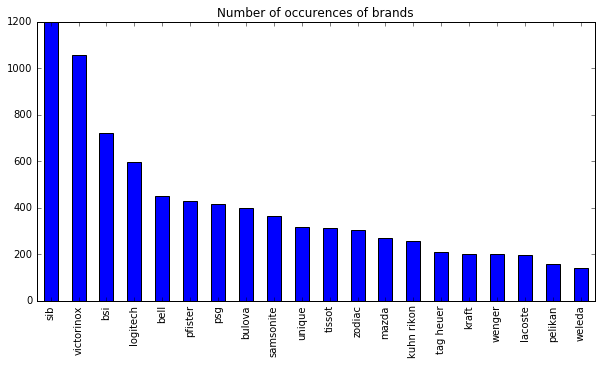

In [7]:
df.brand.value_counts()[:20].plot(kind='bar', figsize=(10,5), title="Number of occurences of brands")

In [8]:
df.brand.value_counts()

sib               1199
victorinox        1056
bsi                720
logitech           595
bell               451
pfister            429
psg                417
bulova             399
samsonite          366
unique             316
tissot             311
zodiac             302
mazda              269
kuhn rikon         255
tag heuer          211
kraft              202
wenger             199
lacoste            198
pelikan            156
weleda             139
davidoff            92
scott               88
raymond weil        88
la prairie          79
primo               78
maggi               73
ricola              67
arctic              66
cyma                62
atb                 59
                  ... 
mettler toledo       2
insight              2
3a                   2
blick                2
oh!                  2
revue thommen        2
annabelle            2
cerruti 1881         2
assos                2
backyard             2
lugano               2
rsr                  2
emmi       

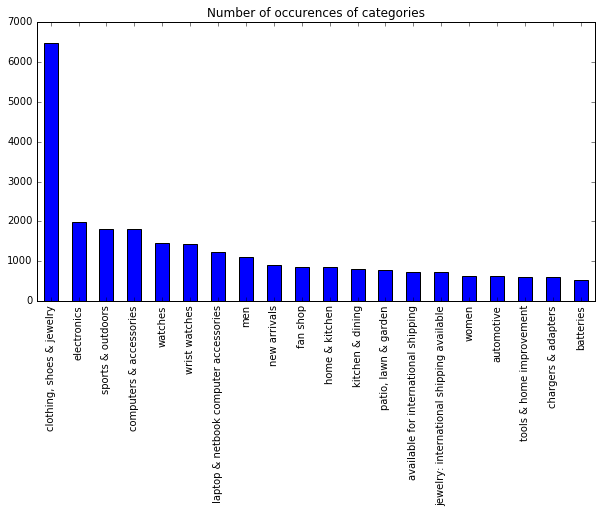

In [9]:
flatten = lambda l: [item for sublist in l for item in sublist]
categories_list = []
for categories in df.categories:
    for categorie in flatten(categories):
        categories_list.append(categorie)

pd.Series(categories_list).value_counts()[:20].plot(kind='bar', figsize=(10,5), title="Number of occurences of categories")

In [10]:
import pickle
productids = set(df.asin.tolist())

with open('data/productids.pickle', 'wb') as fp:
    pickle.dump(productids, fp)

In [13]:
dictionary = dict(zip(df.asin.tolist(), df.categories.tolist()))

with open('data/productcategories.pickle', 'wb') as fp:
    pickle.dump(dictionary, fp, protocol=2)

In [12]:
df[df['brand'] == 'logitech']

,asin,categories,title,brand,salesrank,related,imurl,price,description
8,b00001u07n,"[[electronics, computers & accessories, webcams]]",logitech quickcam pro usb (pc),logitech,{},{'also_viewed': ['b00004vugq']},http://ecx.images-amazon.com/images/i/41eytqcq...,49.97,logitech's quickcam pro is the company's first...
26,b00004vugj,"[[electronics, computers & accessories, cables...",logitech cordless trackman wheel,logitech,{},"{'bought_together': ['b0043t7fxe'], 'also_view...",http://ecx.images-amazon.com/images/i/41nppk37...,239.99,the logitech cordless trackman wheel provides ...
27,b00004y308,"[[video games, pc, accessories, controllers, g...",logitech wingman precision gamepad,logitech,{},"{'also_viewed': ['b003vahyqy', 'b00aewtswu', '...",http://ecx.images-amazon.com/images/i/4138377c...,6.73,"works great with all games including: sports, ..."
49,b000063ilp,"[[electronics, computers & accessories, cables...",logitech 980117 cordless phone and pc headset ...,logitech,{},{},http://ecx.images-amazon.com/images/i/411car1s...,44.00,don't be tied to your desk when you talk over ...
50,b00006b9co,"[[electronics, computers & accessories, pdas, ...",logitech typeaway keyboard ultra slim folding ...,logitech,{},"{'also_viewed': ['b00feyjotk', 'b00bu4ov50', '...",http://ecx.images-amazon.com/images/i/41vw6z8a...,3.25,"an ultra-slim, lightweight folding handheld ke..."
51,b00006b9cp,"[[electronics, computers & accessories, pdas, ...",logitech keycase all in one keyboard &amp; cas...,logitech,{},"{'bought_together': ['b00005awbj', 'b000wvixme...",http://ecx.images-amazon.com/images/i/41q6ehn1...,12.47,it could be the only handheld peripheral you'l...
52,b00006hmpk,"[[electronics, computers & accessories, webcams]]",logitech quickcam pro 4000,logitech,{},"{'also_viewed': ['b006jh8t3s', 'b000bdh2xy', '...",http://ecx.images-amazon.com/images/i/41edsh50...,139.99,"amazon product description video enthusiasts, ..."
55,b00006ox66,"[[video games, more systems, gamecube, hardwar...",logitech speed force accessory pack for ninten...,logitech,{'electronics': 93501},"{'also_viewed': ['b00006hmpp', 'b001d1mg7u', '...",http://ecx.images-amazon.com/images/i/410736ek...,16.30,get the most out of your logitech speed force ...
57,b00006op9c,"[[video games, pc, accessories, controllers, j...",logitech freedom 2.4 ghz cordless joystick,logitech,{},"{'bought_together': ['b001dpze84'], 'also_boug...",http://ecx.images-amazon.com/images/i/41v70133...,129.99,"enjoy the performance of a corded joystick, wi..."
58,b00006skj4,"[[video games, more systems, playstation 2, ha...",logitech netplay controller (sony playstation ...,logitech,{'electronics': 132455},"{'bought_together': ['b000ymqgwu'], 'also_boug...",http://ecx.images-amazon.com/images/i/41w59hv5...,78.98,boost your online gaming performance with logi...
